In [1]:
!pip install wordcloud

# Import semua library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Unduh stopword bahasa Indonesia jika belum ada
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ichikaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('../data/processed/done.csv')  # atau coba 'ISO-8859-1'
df.head()

,id,source,created_at,preprocessed_text,sentimen,skor_sentimen
0,1,x,2025-06-16,gusy mending sunscreen omg apa amaterasun buat...,neutral,0.987218
1,10,x,2025-06-15,wts physical sunscreen amaterasun pakai sekali...,neutral,0.987875
2,15,x,2025-06-14,amaterasun uv sunscreen serum spf pa melindung...,neutral,0.801552
3,18,x,2025-06-14,amaterasun cb kak yg physical sunscreen,neutral,0.964037
4,20,x,2025-06-13,saranin sunscreen bisa nahan minyak ga longsor...,negative,0.684278


In [4]:
def generate_wordcloud_by_label(df, label_value, title):
    text = ' '.join(df[df['sentimen'] == label_value]['preprocessed_text'].astype(str))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    word_freq = Counter(tokens)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

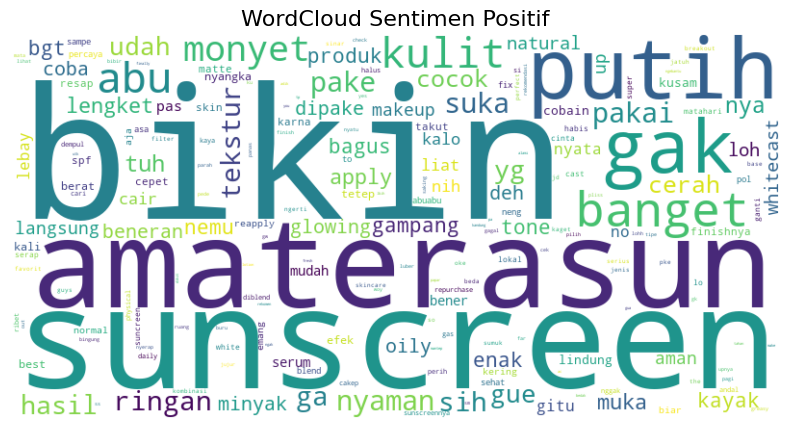

In [5]:
# Wordcloud untuk data positif
generate_wordcloud_by_label(df, 'positive', 'WordCloud Sentimen Positif')

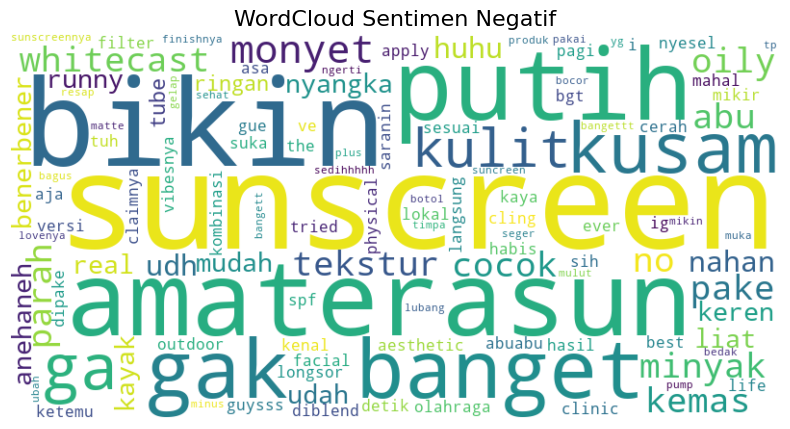

In [6]:
# Wordcloud untuk data negatif
generate_wordcloud_by_label(df, 'negative', 'WordCloud Sentimen Negatif')

In [11]:
# Gabungkan semua teks
all_text = ' '.join(df['preprocessed_text'].astype(str))
tokens = all_text.split()

In [12]:
# Hilangkan stopword dan tanda baca
tokens_clean = [word for word in tokens if word not in stop_words and word not in string.punctuation]
freq_dist = Counter(tokens_clean)

In [15]:
# Ambil 20 kata teratas
common_words = freq_dist.most_common(20)

C:\Users\Ichikaa\AppData\Local\Temp\ipykernel_5312\2001733850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


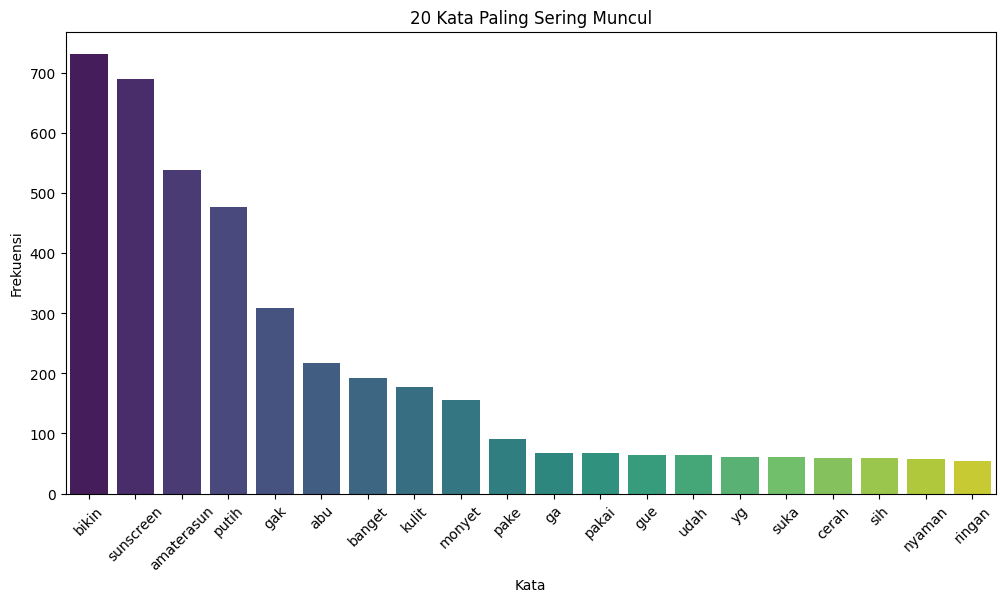

In [16]:
# Visualisasi
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('20 Kata Paling Sering Muncul')
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\Ichikaa\AppData\Local\Temp\ipykernel_5312\2703639220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimen', palette='Set2')


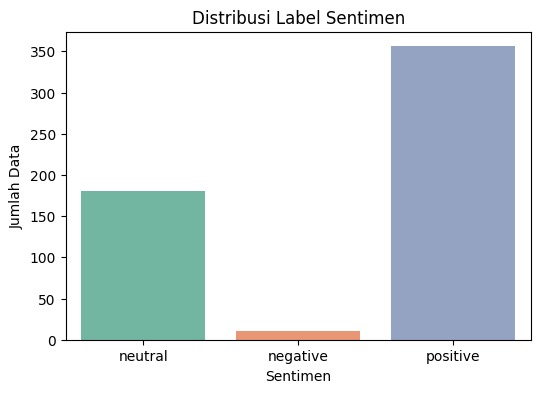

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimen', palette='Set2')
plt.title("Distribusi Label Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()
